In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data=pd.read_excel('obesity_level.xlsx')

In [2]:
data['Gender'] = data['Gender'].map({'Female':0,'Male':1})
data['MTRANS'] = data['MTRANS'].map({'Public_Transportation':0,
                                     'Automobile':1,'Walking':2,'Motorbike':3,'Bike':4})
data['CAEC'] = data['CAEC'].map({0: 0, 'Sometimes': 1,
                                  'Frequently': 2, 'Always': 3})
data['CALC'] = data['CALC'].map({0: 0, 'Sometimes': 1, 
                                 'Frequently': 2})


data['NCP']=data['NCP'].astype(int)
features = data[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
                'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]
target = data['0be1dad']
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2,1,0,2.763573,0,0.000000,0.976473,1,0,Overweight_Level_II
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3,2,0,2.000000,0,1.000000,1.000000,0,1,0rmal_Weight
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1,1,0,1.910378,0,0.866045,1.673584,0,0,Insufficient_Weight
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3,1,0,1.674061,0,1.467863,0.780199,1,0,Obesity_Type_III
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1,1,0,1.979848,0,1.967973,0.931721,1,0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3,1,0,2.151809,0,1.330519,0.196680,1,0,Obesity_Type_II
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4,2,0,1.000000,0,2.000000,1.000000,1,0,Insufficient_Weight
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3,1,0,2.000000,0,1.158040,1.198439,0,0,Obesity_Type_II
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1,1,0,2.144838,0,0.000000,0.973834,0,1,Overweight_Level_II


In [3]:
# print("主成分系数矩阵：",pca.components_)
# print("特征值：",pca.explained_variance_)
# print("方差解释率",pca.explained_variance_ratio_)
features = data[['Gender', 'Age', 'Height', 'Weight','family_history_with_overweight',
                'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]
target = data['0be1dad']

主成分系数矩阵： [[ 2.25163880e-03  6.36874347e-02  1.37026481e-03  9.97862151e-01
   7.50223158e-03  2.41970927e-03  4.94752098e-03  2.27277931e-03
  -5.74425294e-03  1.67570770e-04  7.28729170e-03 -1.25797019e-03
  -2.76607045e-03 -2.05532462e-03  3.88600359e-03 -1.27271616e-03]
 [ 2.97180189e-03  9.95957295e-01 -2.26940902e-03 -6.35959649e-02
   8.05574419e-03 -5.84128972e-04 -3.91996191e-03 -1.57851694e-02
  -4.49823224e-03  9.08886294e-04 -1.30174132e-02 -1.85318100e-03
  -2.73314773e-02 -3.14608615e-02  5.71663798e-04  4.18305323e-02]]
特征值： [698.73900893  29.75890456]
方差解释率 [0.95491721 0.04066939]


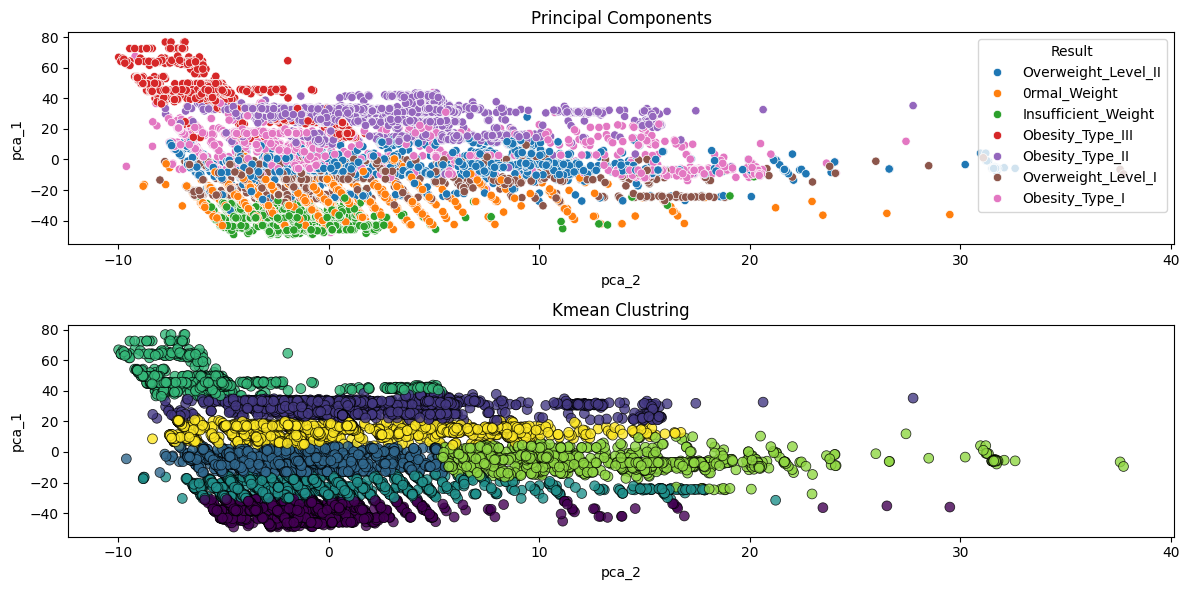

In [4]:
from sklearn.preprocessing import StandardScaler
X=features
y=target

# 应用PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("主成分系数矩阵：",pca.components_)
print("特征值：",pca.explained_variance_)
print("方差解释率",pca.explained_variance_ratio_)

tmp = pd.DataFrame(data = X_pca, columns = ['pca_1','pca_2'])
tmp['Result'] = data['0be1dad']

fig,axs = plt.subplots(2,1,figsize = (12,6))
sns.scatterplot(data=tmp, y="pca_1", x="pca_2", hue='Result',ax=axs[0])
axs[0].set_title("Principal Components")
#KMeans
kmeans = KMeans(7,random_state=42)
kmeans.fit(tmp[['pca_1','pca_2']])
sns.scatterplot( y= tmp['pca_1'],x = tmp['pca_2'],c = kmeans.labels_,cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.8,ax = axs[1])
axs[1].set_title("Kmean Clustring")
plt.tight_layout()
plt.show()
#features = data[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
#                'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]

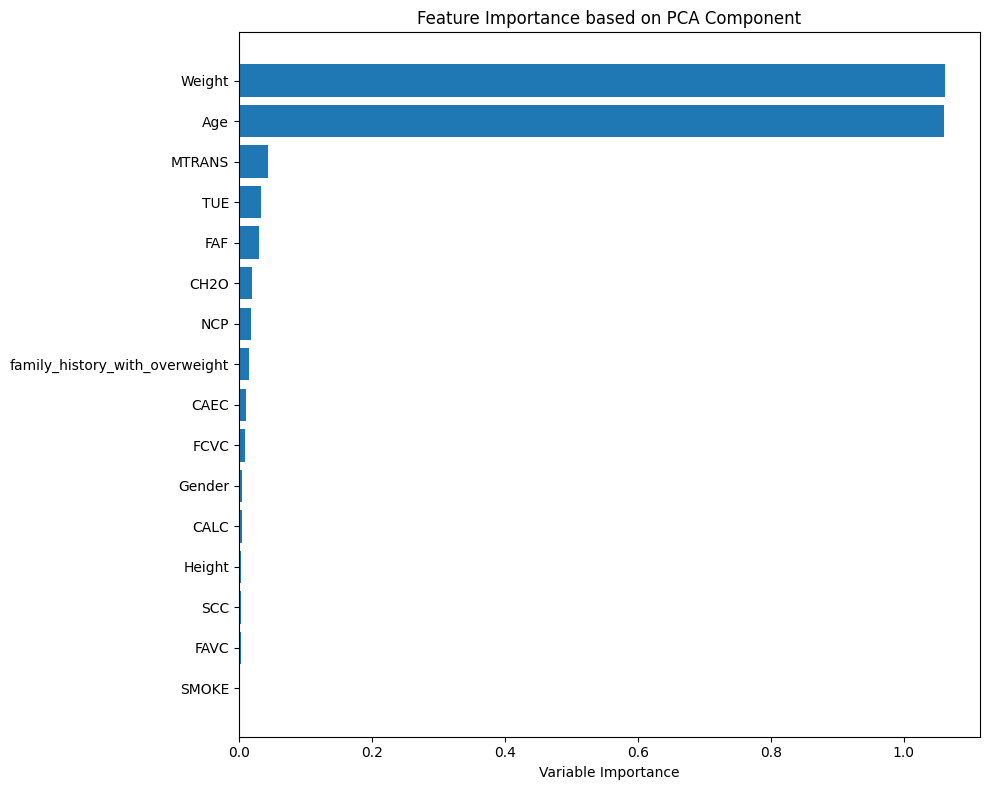

In [5]:
#提取主成分系数矩阵
pca_components = np.abs(pca.components_)

# 计算每个变量对两个主成分的综合贡献（按绝对值求和）
importance = pca_components[1]+pca_components[0]

# 创建变量名列表
variables = features.columns

# 按重要性排序，方便展示
sorted_indices = np.argsort(importance)  # 从小到大排序
variables_sorted = variables[sorted_indices]
importance_sorted = importance[sorted_indices]

# 绘制水平条形图
plt.figure(figsize=(10, 8))
plt.barh(variables_sorted, importance_sorted)  # barh() 创建水平条形图
plt.xlabel("Variable Importance")
plt.title("Feature Importance based on PCA Component")
plt.tight_layout()
plt.show()


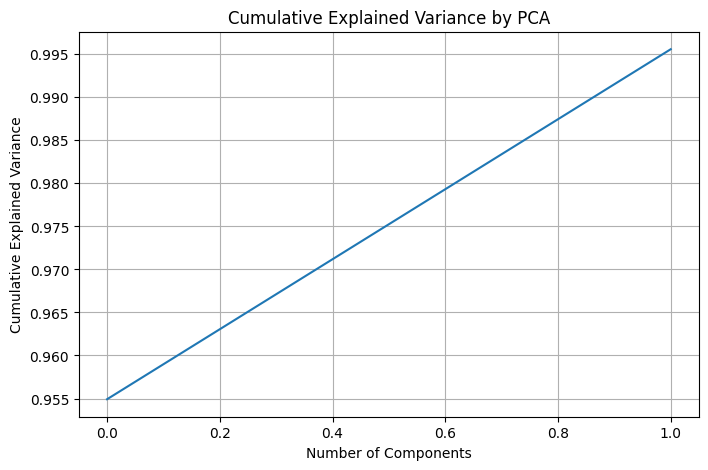

In [6]:
# 计算累积方差贡献率
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid(True)
plt.show()

In [7]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 使用随机森林分类器
clf = RandomForestClassifier(random_state=42)
clf.fit(X_pca[:, :2], y)  # 使用降维后的数据训练
y_pred = clf.predict(X_pca[:, :2])


print(classification_report(y, y_pred))
print(f'Accuracy: {accuracy_score(y, y_pred)}')

                     precision    recall  f1-score   support

       0rmal_Weight       1.00      1.00      1.00      3082
Insufficient_Weight       1.00      1.00      1.00      2523
     Obesity_Type_I       1.00      1.00      1.00      2910
    Obesity_Type_II       1.00      1.00      1.00      3248
   Obesity_Type_III       1.00      1.00      1.00      4046
 Overweight_Level_I       1.00      1.00      1.00      2427
Overweight_Level_II       1.00      1.00      1.00      2522

           accuracy                           1.00     20758
          macro avg       1.00      1.00      1.00     20758
       weighted avg       1.00      1.00      1.00     20758

Accuracy: 0.9999036516042008
